In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, DataCollatorWithPadding

In [2]:
df = pd.read_csv('./Data/train.csv')
df.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [3]:
df.describe(include='object')

,id,anchor,target,context
count,36473,36473,36473,36473
unique,36473,733,29340,106
top,8d135da0b55b8c88,component composite coating,composition,H01
freq,1,152,24,2186


In [4]:
df ['input'] = 'TEXT1: ' + df.context + '; TEXT2: ' + df.target + '; ANC1: ' + df.anchor
df.input.head()

0    TEXT1: A47; TEXT2: abatement of pollution; ANC...
1    TEXT1: A47; TEXT2: act of abating; ANC1: abate...
2    TEXT1: A47; TEXT2: active catalyst; ANC1: abat...
3    TEXT1: A47; TEXT2: eliminating process; ANC1: ...
4    TEXT1: A47; TEXT2: forest region; ANC1: abatement
Name: input, dtype: object

Tokenization

In [5]:
ds = Dataset.from_pandas(df)
ds

Dataset({
    features: ['id', 'anchor', 'target', 'context', 'score', 'input'],
    num_rows: 36473
})

Selecting a Model for the Tokenization Process

In [6]:
model_nm = 'microsoft/deberta-v3-small'

In [7]:
tokz = AutoTokenizer.from_pretrained('bert-base-uncased', use_fast=True)
tokens = tokz("i LOVE YOU")
print(tokens)

{'input_ids': [101, 1045, 2293, 2017, 102], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}


In [8]:
tokz.tokenize("i LOVE YOU.")

['i', 'love', 'you', '.']

In [9]:
def tokenize_function(examples):
    return tokz(examples['input'])   

In [10]:
tok_ds = ds.map(tokenize_function, batched=True)

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

In [11]:
print(tok_ds[0])
row = tok_ds[0]
row['input'] , row['input_ids']

{'id': '37d61fd2272659b1', 'anchor': 'abatement', 'target': 'abatement of pollution', 'context': 'A47', 'score': 0.5, 'input': 'TEXT1: A47; TEXT2: abatement of pollution; ANC1: abatement', 'input_ids': [101, 3793, 2487, 1024, 1037, 22610, 1025, 3793, 2475, 1024, 19557, 18532, 4765, 1997, 10796, 1025, 2019, 2278, 2487, 1024, 19557, 18532, 4765, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


('TEXT1: A47; TEXT2: abatement of pollution; ANC1: abatement',
 [101,
  3793,
  2487,
  1024,
  1037,
  22610,
  1025,
  3793,
  2475,
  1024,
  19557,
  18532,
  4765,
  1997,
  10796,
  1025,
  2019,
  2278,
  2487,
  1024,
  19557,
  18532,
  4765,
  102])

In [12]:
tokz.vocab['of']

1997

In [13]:
tok_ds = tok_ds.rename_column('score','labels')

In [14]:
print(tok_ds[0])

{'id': '37d61fd2272659b1', 'anchor': 'abatement', 'target': 'abatement of pollution', 'context': 'A47', 'labels': 0.5, 'input': 'TEXT1: A47; TEXT2: abatement of pollution; ANC1: abatement', 'input_ids': [101, 3793, 2487, 1024, 1037, 22610, 1025, 3793, 2475, 1024, 19557, 18532, 4765, 1997, 10796, 1025, 2019, 2278, 2487, 1024, 19557, 18532, 4765, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


Testing

In [15]:
eval_df = pd.read_csv('./Data/test.csv')
eval_df.head()
eval_df.describe(include='object')

,id,anchor,target,context
count,36,36,36,36
unique,36,34,36,29
top,4112d61851461f60,hybrid bearing,inorganic photoconductor drum,G02
freq,1,2,1,3


In [16]:
def f(x):
    return -3*x**2 + 2*x + 1

def plot_function(f,min = -2.1, max = 2.1,  color = 'r'):
    x = np.linspace(min, max, 100).reshape(-1, 1)
    plt.plot(x, f(x), color=color)

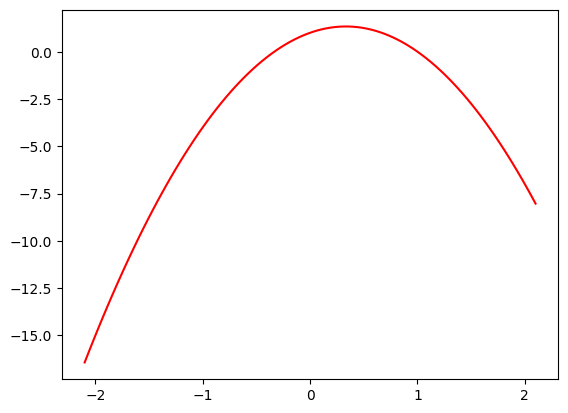

In [17]:
plot_function(f)

In [18]:
from numpy.random import normal, uniform, seed

In [19]:
def noise(x, scale):
    return normal (scale=scale, size=x.shape)

def add_noise(x, mult, add):
    return x * (1+noise(x, mult)) + noise(x, add)

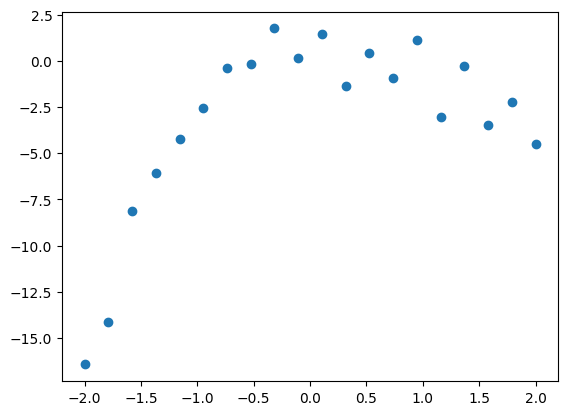

In [20]:
x = np.linspace(-2, 2, num=20)
y = add_noise(f(x), 0.2, 1.3)
x = x.reshape(-1, 1)
plt.scatter(x,y)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [22]:
def plot_poly(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x, y)
    plt.scatter(x,y)
    plot_function(model.predict)

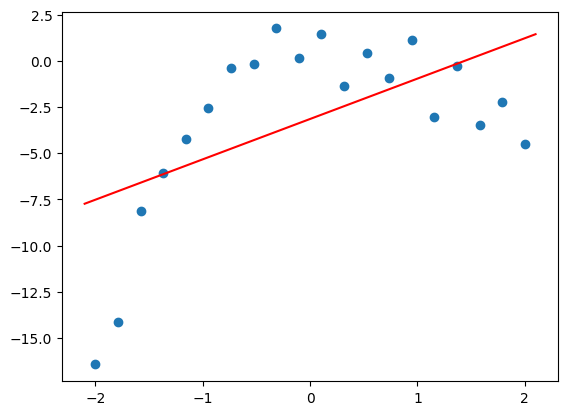

In [23]:
plot_poly(1)

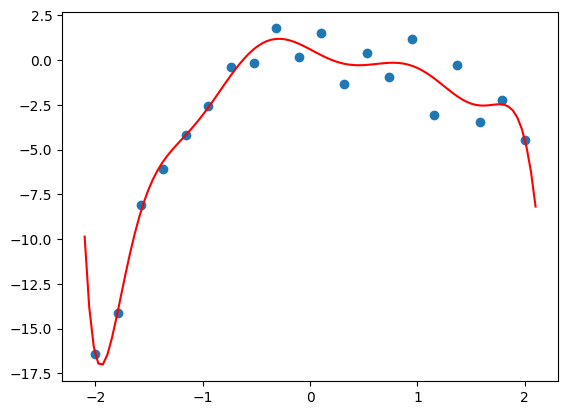

In [24]:
plot_poly(10)

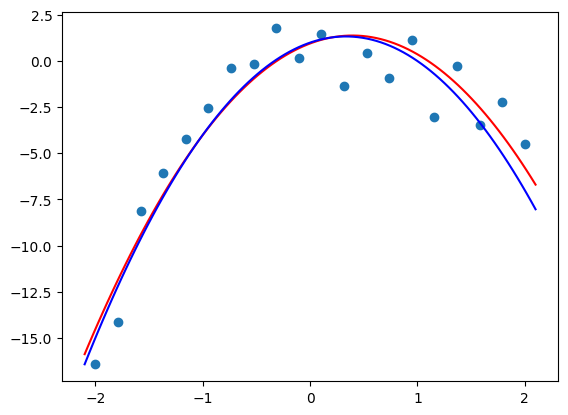

In [25]:
plot_poly(2)
plot_function(f, color='b')

In [26]:
dds = tok_ds.train_test_split(0.25, seed=42)
dds

DatasetDict({
    train: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 27354
    })
    test: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9119
    })
})

In [27]:
def tok_func(x):
    return tokz(x["input"])


In [28]:
eval_df['input'] = 'TEXT1: ' + eval_df.context + '; TEXT2: ' + eval_df.target + '; ANC1: ' + eval_df.anchor
eval_ds = Dataset.from_pandas(eval_df).map(tok_func, batched=True)

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

In [29]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing = housing['data'].join(housing['target']).sample(1000, random_state=52)
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7506,3.0550,37.0,5.152778,1.048611,729.0,5.062500,33.92,-118.28,1.054
4720,3.0862,35.0,4.697897,1.055449,1159.0,2.216061,34.05,-118.37,3.453
12888,2.5556,24.0,4.864905,1.129222,1631.0,2.395007,38.66,-121.35,1.057
13344,3.0057,32.0,4.212687,0.936567,1378.0,5.141791,34.05,-117.64,0.969
7173,1.9083,42.0,3.888554,1.039157,1535.0,4.623494,34.05,-118.19,1.192


In [30]:
np.set_printoptions(precision=2, suppress=True)

np.corrcoef(housing, rowvar=False)

array([[ 1.  , -0.12,  0.43, -0.08,  0.01, -0.07, -0.12,  0.04,  0.68],
       [-0.12,  1.  , -0.17, -0.06, -0.31,  0.  ,  0.03, -0.13,  0.12],
       [ 0.43, -0.17,  1.  ,  0.76, -0.09, -0.07,  0.12, -0.03,  0.21],
       [-0.08, -0.06,  0.76,  1.  , -0.08, -0.07,  0.09,  0.  , -0.04],
       [ 0.01, -0.31, -0.09, -0.08,  1.  ,  0.16, -0.15,  0.13,  0.  ],
       [-0.07,  0.  , -0.07, -0.07,  0.16,  1.  , -0.16,  0.17, -0.27],
       [-0.12,  0.03,  0.12,  0.09, -0.15, -0.16,  1.  , -0.93, -0.16],
       [ 0.04, -0.13, -0.03,  0.  ,  0.13,  0.17, -0.93,  1.  , -0.03],
       [ 0.68,  0.12,  0.21, -0.04,  0.  , -0.27, -0.16, -0.03,  1.  ]])

In [31]:
np.corrcoef(housing.MedInc, housing.MedHouseVal)

array([[1.  , 0.68],
       [0.68, 1.  ]])

In [32]:
def corr(x,y): return np.corrcoef(x,y)[0][1]

corr(housing.MedInc, housing.MedHouseVal)

np.float64(0.6760250732906004)

In [33]:
def show_corr(df, a, b):
    x,y = df[a],df[b]
    plt.scatter(x,y, alpha=0.5, s=4)
    plt.title(f'{a} vs {b}; r: {corr(x, y):.2f}')

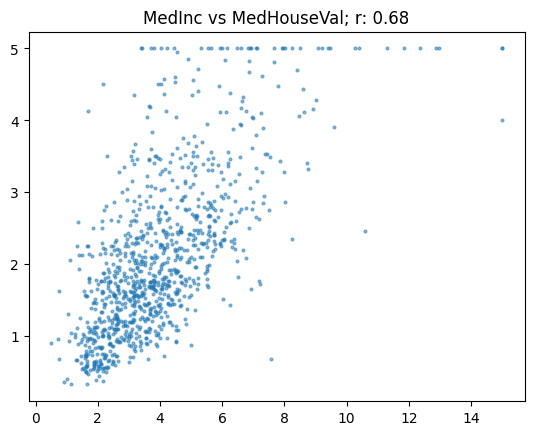

In [34]:
show_corr(housing, 'MedInc', 'MedHouseVal')

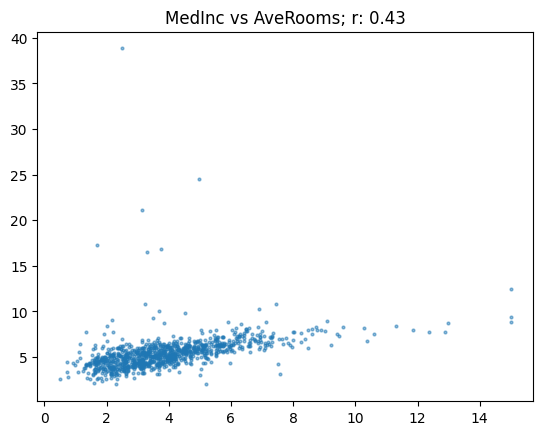

In [35]:
show_corr(housing, 'MedInc', 'AveRooms')

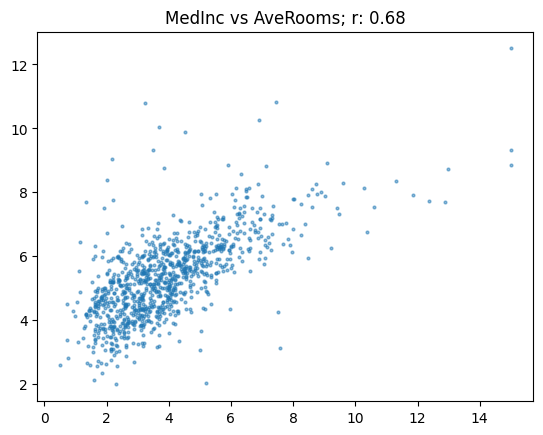

In [36]:
subset = housing[housing.AveRooms<15]
show_corr(subset, 'MedInc', 'AveRooms')

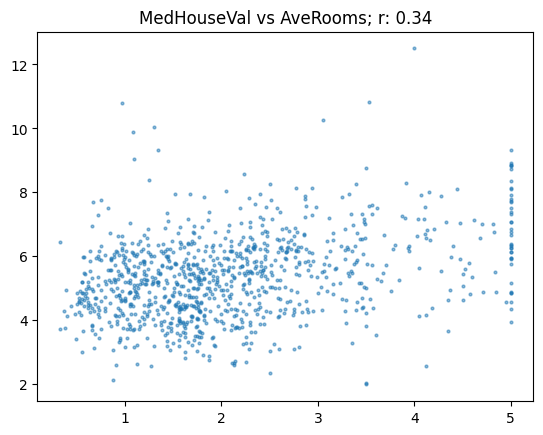

In [37]:
show_corr(subset, 'MedHouseVal', 'AveRooms')

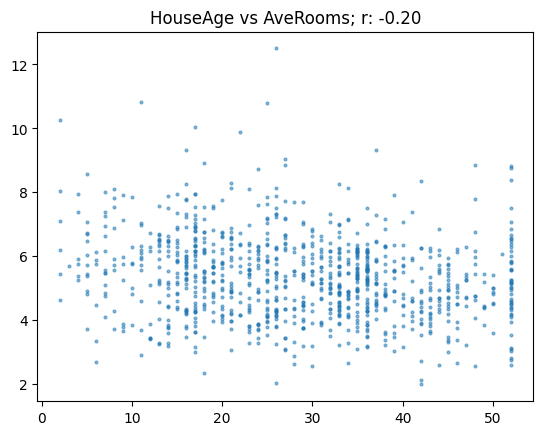

In [38]:
show_corr(subset, 'HouseAge', 'AveRooms')

In [39]:
def corr_d(eval_pred): return {'pearson': corr(*eval_pred)}

In [40]:
from transformers import TrainingArguments,Trainer

In [41]:
bs = 128
epochs = 4

In [42]:
lr = 8e-5

In [43]:
args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
    eval_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
    num_train_epochs=epochs, weight_decay=0.01, report_to='none')

In [44]:
from transformers import AutoModelForSequenceClassification 
model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)
trainer = Trainer(model, args, train_dataset=dds['train'], eval_dataset=dds['test'],
                  tokenizer=tokz, compute_metrics=corr_d)

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\hp\AppData\Local\Temp\ipykernel_28716\1278660024.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=dds['train'], eval_dataset=dds['test'],


In [45]:
trainer.train();

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [46]:
preds = trainer.predict(eval_ds).predictions.astype(float)
preds

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


array([[0.36],
       [0.41],
       [0.23],
       [0.2 ],
       [0.27],
       [0.37],
       [0.36],
       [0.27],
       [0.31],
       [0.4 ],
       [0.23],
       [0.2 ],
       [0.25],
       [0.39],
       [0.3 ],
       [0.22],
       [0.2 ],
       [0.25],
       [0.24],
       [0.18],
       [0.27],
       [0.25],
       [0.26],
       [0.23],
       [0.3 ],
       [0.29],
       [0.31],
       [0.21],
       [0.25],
       [0.27],
       [0.22],
       [0.24],
       [0.41],
       [0.27],
       [0.22],
       [0.21]])

In [47]:
preds = np.clip(preds, 0, 1)

In [48]:
preds

array([[0.36],
       [0.41],
       [0.23],
       [0.2 ],
       [0.27],
       [0.37],
       [0.36],
       [0.27],
       [0.31],
       [0.4 ],
       [0.23],
       [0.2 ],
       [0.25],
       [0.39],
       [0.3 ],
       [0.22],
       [0.2 ],
       [0.25],
       [0.24],
       [0.18],
       [0.27],
       [0.25],
       [0.26],
       [0.23],
       [0.3 ],
       [0.29],
       [0.31],
       [0.21],
       [0.25],
       [0.27],
       [0.22],
       [0.24],
       [0.41],
       [0.27],
       [0.22],
       [0.21]])

In [49]:
import datasets

submission = datasets.Dataset.from_dict({
    'id': eval_ds['id'],
    'score': preds
})

submission.to_csv('./Data/sample_submission.csv', index=False)

Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

904